In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from PIL import Image

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage


import glob as glob
print(tf.__version__)

1.10.0


In [3]:
files = glob.glob('Flat_N/*png')

In [4]:
files1 = glob.glob('Flat_N/Fold_1_*png')
files2 = glob.glob('Flat_N/Fold_2_*png')
files3 = glob.glob('Flat_N/Fold_3_*png')
files4 = glob.glob('Flat_N/Fold_4_*png')
files5 = glob.glob('Flat_N/Fold_5_*png')
files6 = glob.glob('Flat_N/Fold_6_*png')
files7 = glob.glob('Flat_N/Fold_7_*png')
files8 = glob.glob('Flat_N/Fold_8_*png')
files9 = glob.glob('Flat_N/Fold_9_*png')
files10 = glob.glob('Flat_N/Fold_10_*png')

In [5]:
files = np.random.permutation(files1 + files2 + files3 + files4 + files5 + files6 + files7 + files8 + files9 + files10)
n_classes = 10

In [6]:
L = len(files)
L

30780

In [7]:
train_fraction = 0.8
N_train = int(train_fraction*L)
N_test = L - N_train
N_train_augmented = 4*N_train # rotate the dataset 

In [8]:
x_train = np.zeros((N_train*4,256,256,1))
y_train = np.zeros(N_train*4)
x_test = np.zeros((N_test,256,256,1))
y_test = np.zeros(N_test)

In [9]:
for i in range(N_train):
    img = Image.open(files[i])
    label = int(files[i].split('_')[2]) # the label is in the file name i.e. Flat_N_n_*.png
    A=np.asarray(img)
    # Scale between 0 and 1. 
    A = A/255.0

    # Convert RGB image to greyscale. 
    A_grey = np.mean(A, -1) 

    # Downsize the image
    # A_grey_zoom = scipy.ndimage.zoom(A_grey, 0.25, order=2)
    x_train[i][:,:,0] = 1-A_grey
    y_train[i] = label-1
    
# Add to the training set -- transpose
for i in range(N_train):
    x_train[i+N_train][:,:,0] = x_train[i][:,:,0].transpose()
    y_train[i+N_train] = y_train[i]
    
# Add to the training set -- flip the data
for i in range(N_train):
    x_train[i+2*N_train][:,:,0] = np.flipud(x_train[i][:,:,0])
    y_train[i+2*N_train] = y_train[i]
    
# Add to the training set -- flip the data
for i in range(N_train):
    x_train[i+3*N_train][:,:,0] = np.fliplr(x_train[i][:,:,0])
    y_train[i+3*N_train] = y_train[i]    

# Compute the test set
for i in range(N_test):
    j = i+N_train 
    img = Image.open(files[j])
    label = int(files[j].split('_')[2]) 
    A=np.asarray(img)
    # Scale between 0 and 1. 
    A = A/255.0

    # Convert RGB image to greyscale. 
    A_grey = np.mean(A, -1) 

    # Downsize the image
    # A_grey_zoom = scipy.ndimage.zoom(A_grey, 0.25, order=1)
    x_test[i][:,:,0] = 1-A_grey
    y_test[i] = label-1 

In [10]:
x_train = np.sign(x_train)
x_test = np.sign(x_test)

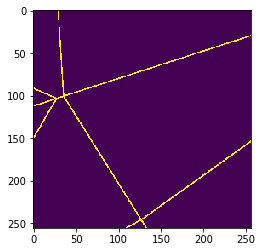

In [30]:
plt.imshow(x_train[100,:,:,0])

In [12]:
y_test[0:20]

array([5., 8., 7., 1., 1., 5., 9., 5., 9., 2., 9., 8., 7., 4., 1., 7., 5.,
       3., 4., 1.])

# Model 1

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64, 1)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=15)

In [202]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

6156/6156 [==============================] - 1s 115us/step
Test accuracy: 0.40367121511345333


In [203]:
predictions = model.predict(x_test)

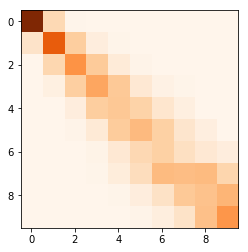

In [204]:
mat = np.zeros((n_classes,n_classes))
for i in range(N_test):
    mat[np.argmax(predictions[i]),int(y_test[i])] += 1
plt.imshow(mat,cmap='Oranges')

# Model 2

In [17]:
model = keras.Sequential([
    keras.layers.Conv2D(kernel_size=(3,3),filters=8,input_shape=(64, 64, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(n_classes, activation=tf.nn.softmax)
])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 8)         80        
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 3,937,754
Trainable params: 3,937,754
Non-trainable params: 0
_________________________________________________________________


In [19]:
model = keras.Sequential([
    keras.layers.Conv2D(kernel_size=(3,3),filters=8,input_shape=(64, 64, 1)),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(kernel_size=(3,3),filters=16),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(n_classes, activation=tf.nn.softmax)
])

In [24]:
model = keras.Sequential([
    keras.layers.Conv2D(kernel_size=(3,3),filters=8,input_shape=(256, 256, 1)),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(kernel_size=(3,3),filters=16),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    keras.layers.Flatten(),
    #keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(n_classes, activation=tf.nn.softmax)
])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 8)       80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 125, 125, 16)      1168      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        18496     
__________

In [26]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, epochs=15,validation_data=(x_test,y_test))

Train on 98496 samples, validate on 6156 samples
Epoch 1/15
 4000/98496 [>.............................] - ETA: 1:08:40 - loss: 1.9855 - acc: 0.2258

KeyboardInterrupt: 

In [277]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

6156/6156 [==============================] - 10s 2ms/step
Test accuracy: 0.4891163092530184


In [282]:
predictions = model.predict(x_test)

In [279]:
np.sum(mat[0])

1.0

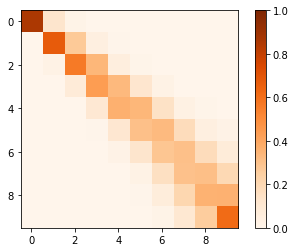

In [283]:
mat = np.zeros((n_classes,n_classes))
for i in range(len(y_test)):
    mat[np.argmax(predictions[i]),int(y_test[i])] += 1
for i in range(n_classes):
    mat[i] /= np.sum(mat[i])
plt.imshow(mat,cmap='Oranges')
plt.colorbar()
plt.clim(0,1)

In [9]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [145]:
train_images.shape

(60000, 28, 28)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_images)

10000

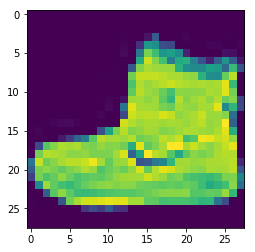

In [22]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)

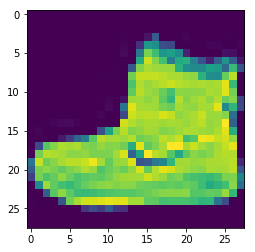

In [23]:
plt.figure()
plt.imshow(train_images[0])

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

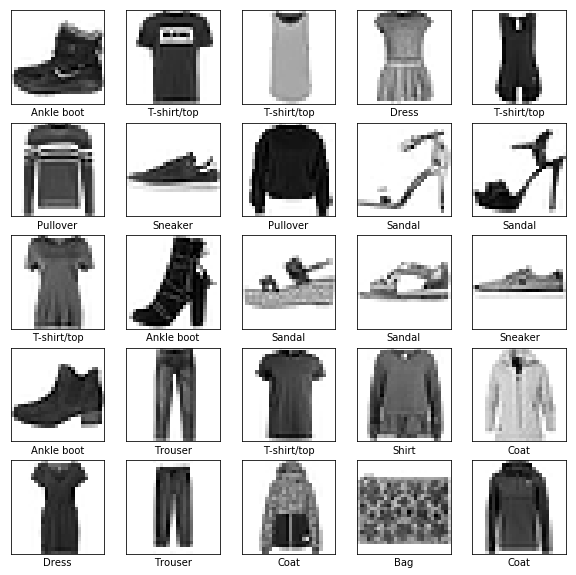

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28,1)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

In [27]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.5003 - acc: 0.8227
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3729 - acc: 0.8659
Epoch 3/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3363 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.3130 - acc: 0.8860
Epoch 5/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2965 - acc: 0.8904


In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/step
Test accuracy: 0.8724


In [31]:
predictions = model.predict(test_images)

In [32]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

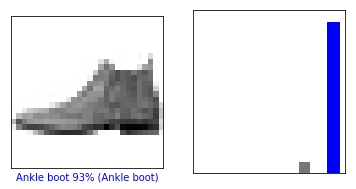

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)